In [48]:
# Libraries to be imported for data exploration
import pretty_errors
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from scipy import stats
from datetime import datetime
import numpy as np
from pprint import pprint

In [49]:
# Final variable(s)
DATA_PATH = "../data/raw/customer_purchases.csv"

In [50]:
# Loads the data into a pandas dataframe
df = pd.read_csv(DATA_PATH)
df.head()

,customer_id,age,gender,annual_income,purchase_amount,purchase_date,next_month_purchase_amount
0,1,40.0,Female,119228.0,986.86,2023-11-22T19:16:58+03:00,NaN
1,1,40.0,Female,119228.0,1102.69,2024-03-19T19:16:58+03:00,NaN
2,1,40.0,Female,119228.0,428.70,2023-11-05T19:16:58+03:00,NaN
3,1,40.0,Female,119228.0,261.08,2024-04-28T19:16:58+03:00,NaN
4,1,40.0,Female,119228.0,1247.51,2023-10-23T19:16:58+03:00,NaN


In [51]:
# Drops the label column since it is empty
label_column_name = "next_month_purchase_amount"
df.drop(columns=[label_column_name], inplace=True)
df.head()

,customer_id,age,gender,annual_income,purchase_amount,purchase_date
0,1,40.0,Female,119228.0,986.86,2023-11-22T19:16:58+03:00
1,1,40.0,Female,119228.0,1102.69,2024-03-19T19:16:58+03:00
2,1,40.0,Female,119228.0,428.70,2023-11-05T19:16:58+03:00
3,1,40.0,Female,119228.0,261.08,2024-04-28T19:16:58+03:00
4,1,40.0,Female,119228.0,1247.51,2023-10-23T19:16:58+03:00


In [52]:
# Converts the purchase_date column to a datetime object
df["purchase_date"] = pd.to_datetime(df["purchase_date"])

# Sorts the dataframe by customer_id and then by purchase_date
df = df.sort_values(["customer_id", "purchase_date"])
df.head(20)

,customer_id,age,gender,annual_income,purchase_amount,purchase_date
8,1,40.0,Female,119228.0,629.34,2023-07-06 19:16:58+03:00
6,1,40.0,Female,119228.0,96.20,2023-07-20 19:16:58+03:00
10,1,40.0,Female,119228.0,775.89,2023-10-12 19:16:58+03:00
4,1,40.0,Female,119228.0,1247.51,2023-10-23 19:16:58+03:00
2,1,40.0,Female,119228.0,428.70,2023-11-05 19:16:58+03:00
0,1,40.0,Female,119228.0,986.86,2023-11-22 19:16:58+03:00
9,1,40.0,Female,119228.0,712.36,2023-12-10 19:16:58+03:00
7,1,40.0,Female,119228.0,991.39,2023-12-23 19:16:58+03:00
5,1,40.0,Female,119228.0,216.73,2024-02-10 19:16:58+03:00
1,1,40.0,Female,119228.0,1102.69,2024-03-19 19:16:58+03:00


In [53]:
# Prints non-null values for each column and the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9805 entries, 8 to 9799
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype                    
---  ------           --------------  -----                    
 0   customer_id      9805 non-null   int64                    
 1   age              9782 non-null   float64                  
 2   gender           9788 non-null   object                   
 3   annual_income    9800 non-null   float64                  
 4   purchase_amount  9805 non-null   float64                  
 5   purchase_date    9805 non-null   datetime64[ns, UTC+03:00]
dtypes: datetime64[ns, UTC+03:00](1), float64(3), int64(1), object(1)
memory usage: 536.2+ KB


In [54]:
# Prints the number of missing values for each column
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
customer_id         0
age                23
gender             17
annual_income       5
purchase_amount     0
purchase_date       0
dtype: int64


In [55]:
# Determines the number of duplicate rows in the dataframe and then prints them
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)


Number of duplicate rows: 0
Empty DataFrame
Columns: [customer_id, age, gender, annual_income, purchase_amount, purchase_date]
Index: []


In [56]:
# Prints the number of customer_id values that only appear once
unique_customer_ids = df["customer_id"].value_counts()
count = len(unique_customer_ids[unique_customer_ids == 1])
print(f"Number of customer_id values that appear once: {count}")

# Drops the customer_ids that only appear once
df = df.groupby("customer_id").filter(lambda x: len(x) > 1)

Number of customer_id values that appear once: 157


In [57]:
# Prints the number of negative purchase_amount values
count = len(df[df["purchase_amount"] < 0])
print(f"Number of negative purchase_amount values: {count}")

# Drops the rows with negative purchase_amount values
df = df[df["purchase_amount"] >= 0]

Number of negative purchase_amount values: 0


In [58]:
# Prints the number of negative annual_income values
count = len(df[df["annual_income"] < 0])
print(f"Number of negative annual_income values: {count}")

# Drops the rows with negative annual_income values
df = df[df["annual_income"] >= 0]

Number of negative annual_income values: 0


In [59]:
# Prints the number of zero or negative age values
count = len(df[df["age"] <= 0])
print(f"Number of negative age values: {count}")

# Drops the rows with negative age values
df = df[df["age"] > 0]

Number of negative age values: 6


In [60]:
# Fills missing values in gender column with the mode of the column
df["gender"].fillna(df["gender"].mode()[0], inplace=True)

# Converts gender type to category
df["gender"] = df["gender"].astype("category")

In [61]:
# Prints the customer_id groups with missing values in the annual_income column
print("\nCustomer ID groups with missing values in the gender column:")
customer_id_missing_gender = df[df["gender"].isnull()]["customer_id"].unique()
print(df[df["customer_id"].isin(customer_id_missing_gender)][["customer_id", "gender"]])

# Drops the customer_ids with missing values in the gender
# since they are only 2 and they do not have any other information to fill the missing values
df = df.drop(
    df[df["customer_id"].isin(customer_id_missing_gender)].index
)


Customer ID groups with missing values in the gender column:
Empty DataFrame
Columns: [customer_id, gender]
Index: []


In [62]:
# Prints the initial statistics of the dataframe
print(df.describe())

       customer_id          age  annual_income  purchase_amount
count  9619.000000  9619.000000   9.619000e+03      9619.000000
mean   1010.137540    37.490592   8.437540e+04       596.654828
std     576.460027    16.369302   3.449935e+04       349.602812
min       1.000000    18.000000   0.000000e+00         0.130000
25%     503.000000    25.000000   6.087000e+04       303.480000
50%    1019.000000    34.000000   8.516600e+04       590.100000
75%    1512.000000    44.000000   1.103170e+05       872.285000
max    2000.000000    80.000000   1.015980e+06      1399.870000


In [63]:
# Prints the statistics of the dataframe grouped by gender
display(
    HTML(
        df.groupby("gender").agg(
            {
                "purchase_amount": ["mean", "median", "min", "max"],
                "age": ["mean", "median", "min", "max"],
                "annual_income": ["mean", "median", "min", "max"]
            }
        ).to_html()
    )
)

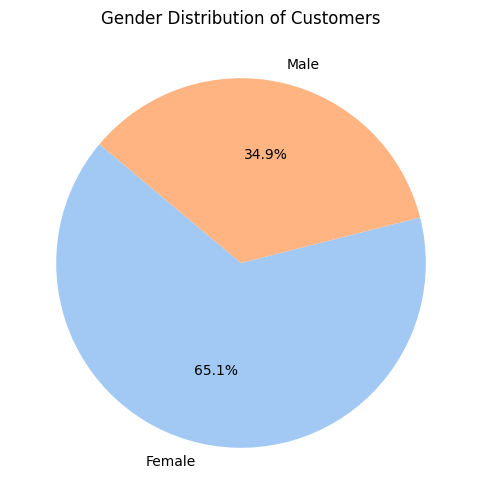

In [64]:
# Plots the gender distribution of the customers pie
colors = colors = sns.color_palette("pastel")[0:2]
plt.figure(figsize=(10, 6))
plt.title("Gender Distribution of Customers")
plt.pie(
    df.gender.value_counts(),
    labels=df.gender.value_counts().index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
)
plt.show()

In [65]:
# Calculates the t-statistic and p-value for the difference in mean purchase amounts

# Separate purchase amounts by gender
male_purchases = df[(df["gender"] == "Male") & (df["purchase_amount"] != 0)]["purchase_amount"]
female_purchases = df[(df["gender"] == "Female") & (df["purchase_amount"] != 0)]["purchase_amount"]

# Performs t-test for the difference in mean purchase amounts
t_stat, p_value = stats.ttest_ind(male_purchases, female_purchases)

# Prints the hypotheses, t-statistic, p-value, and conclusion
print("Hypotheses:")
print("H0 (Null): There is no significant difference in mean purchase amounts between genders.")
print("H1 (Alternative): There is a significant difference in mean purchase amounts between genders.")
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nReject the null hypothesis (p-value < {alpha})")
    print("There is a statistically significant difference in purchase amounts between genders.")
else:
    print(f"\nFail to reject the null hypothesis (p-value >= {alpha})")
    print("There isn't enough evidence to conclude a significant difference in purchase amounts between genders.")

Hypotheses:
H0 (Null): There is no significant difference in mean purchase amounts between genders.
H1 (Alternative): There is a significant difference in mean purchase amounts between genders.

T-statistic: -1.9736
P-value: 0.0485

Reject the null hypothesis (p-value < 0.05)
There is a statistically significant difference in purchase amounts between genders.


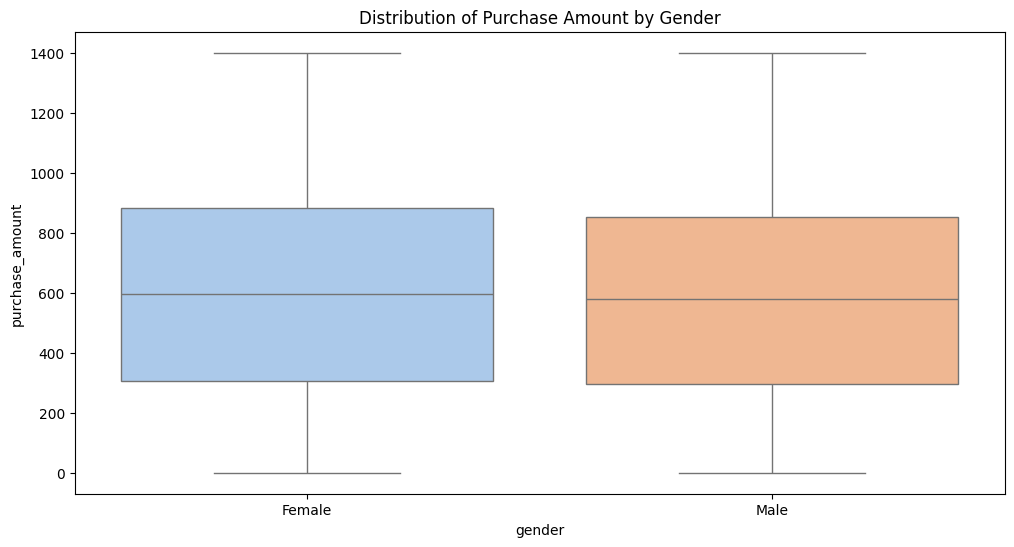

In [66]:
# Plots the distribution of purchase amount by gender as a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x="gender", y="purchase_amount", data=df, palette="pastel")
plt.title("Distribution of Purchase Amount by Gender")
plt.show()

In [67]:
# Converts purchase_date to datetime and extract year-month period
df["purchase_date"] = pd.to_datetime(df["purchase_date"])
df["year_month"] = df["purchase_date"].dt.to_period("M")

In [68]:
# Adds frequency column to the dataframe
df["frequency"] = df.groupby(["customer_id", "year_month"])["customer_id"].transform("count")

In [69]:
# Creates a new feature that shows the number of days since the last purchase
days_passed = []
for customer_id, group in df.groupby("customer_id"):
    days_passed.append(-1)
    last_purchase_date = group.iloc[0]["purchase_date"]
    for i in range(1, len(group)):
        time_difference = (group.iloc[i]["purchase_date"] - last_purchase_date).days
        if group.iloc[i]["purchase_amount"] > 0:
           last_purchase_date = group.iloc[i]["purchase_date"]
        days_passed.append(time_difference)
        
df["days_since_last_purchase"] = days_passed

In [70]:
# Calculates the average time between purchases for each customer
df["avg_days_between_purchases"] = df.groupby("customer_id")["days_since_last_purchase"].transform("mean")
df["avg_days_between_purchases"] = df["avg_days_between_purchases"].astype(int)
print("Average time between purchases added:")
df[["customer_id", "purchase_date", "avg_days_between_purchases"]].head(20)

Average time between purchases added:


,customer_id,purchase_date,avg_days_between_purchases
8,1,2023-07-06 19:16:58+03:00,26
6,1,2023-07-20 19:16:58+03:00,26
10,1,2023-10-12 19:16:58+03:00,26
4,1,2023-10-23 19:16:58+03:00,26
2,1,2023-11-05 19:16:58+03:00,26
0,1,2023-11-22 19:16:58+03:00,26
9,1,2023-12-10 19:16:58+03:00,26
7,1,2023-12-23 19:16:58+03:00,26
5,1,2024-02-10 19:16:58+03:00,26
1,1,2024-03-19 19:16:58+03:00,26


In [71]:
# Drops the purchase_date column
df.drop(columns=["purchase_date"], inplace=True)

In [72]:
# Aggregates the dataframe by customer_id and year_month
df = df.groupby(["customer_id", "year_month"]).agg(
    {
        "age": "first",
        "gender": "first",
        "annual_income": "max",
        "purchase_amount": "sum",
        "frequency": "first",
        "days_since_last_purchase": "first",
        "avg_days_between_purchases": "first"
    }
).reset_index()
df.head(10)

,customer_id,year_month,age,gender,annual_income,purchase_amount,frequency,days_since_last_purchase,avg_days_between_purchases
0,1,2023-07,40.0,Female,119228.0,725.54,2,-1,26
1,1,2023-10,40.0,Female,119228.0,2023.40,2,84,26
2,1,2023-11,40.0,Female,119228.0,1415.56,2,13,26
3,1,2023-12,40.0,Female,119228.0,1703.75,2,18,26
4,1,2024-02,40.0,Female,119228.0,216.73,1,49,26
5,1,2024-03,40.0,Female,119228.0,1102.69,1,38,26
6,1,2024-04,40.0,Female,119228.0,261.08,1,40,26
7,2,2023-06,64.0,Male,112085.0,1931.33,2,-1,34
8,2,2023-08,64.0,Male,112085.0,461.49,1,76,34
9,2,2023-09,64.0,Male,112085.0,1274.57,1,30,34


In [73]:
# Sorts the dataframe by customer_id and then by year_month in ascending order
df = df.sort_values(["customer_id", "year_month"])
df.head(10)

,customer_id,year_month,age,gender,annual_income,purchase_amount,frequency,days_since_last_purchase,avg_days_between_purchases
0,1,2023-07,40.0,Female,119228.0,725.54,2,-1,26
1,1,2023-10,40.0,Female,119228.0,2023.40,2,84,26
2,1,2023-11,40.0,Female,119228.0,1415.56,2,13,26
3,1,2023-12,40.0,Female,119228.0,1703.75,2,18,26
4,1,2024-02,40.0,Female,119228.0,216.73,1,49,26
5,1,2024-03,40.0,Female,119228.0,1102.69,1,38,26
6,1,2024-04,40.0,Female,119228.0,261.08,1,40,26
7,2,2023-06,64.0,Male,112085.0,1931.33,2,-1,34
8,2,2023-08,64.0,Male,112085.0,461.49,1,76,34
9,2,2023-09,64.0,Male,112085.0,1274.57,1,30,34


In [74]:
# Generates a complete dataframe for each customer with all months between their first and last purchase
# Fills missing values with forward fill for age, gender, annual_income, and avg_days_between_purchases
# Fills missing purchase_amount, and frequency with 0 to represent inactivity
# Fills missing days_since_last_purchase with former value + 30 to represent inactivity
all_data = []

for customer_id, group in df.groupby("customer_id"):
    start_date = group["year_month"].min()
    end_date = group["year_month"].max()
    
    all_months = pd.period_range(start=start_date, end=end_date, freq="M")
    
    complete_group = pd.DataFrame({
        "customer_id": customer_id,
        "year_month": all_months
    })
    
    complete_group = complete_group.merge(group, on=["customer_id", "year_month"], how="left")
    
    # Forward fill other missing values
    complete_group["age"] = complete_group["age"].fillna(method="ffill")
    complete_group["gender"] = complete_group["gender"].fillna(method="ffill")
    complete_group["annual_income"] = complete_group["annual_income"].fillna(method="ffill")
    complete_group["avg_days_between_purchases"] = complete_group["avg_days_between_purchases"].fillna(method="ffill")
    
    # Fills missing purchase_amount with 0 to represent inactivity
    complete_group["purchase_amount"] = complete_group["purchase_amount"].fillna(0)

    # Fills missing frequency with 0 to represent inactivity
    complete_group["frequency"] = complete_group["frequency"].fillna(0)
    
    # Fills missing days_since_last_purchase with 0 to represent inactivity
    complete_group["days_since_last_purchase"] = complete_group["days_since_last_purchase"].fillna(0)
    
    for i in range(1, len(complete_group)):
        if complete_group.iloc[i]["purchase_amount"] == 0:
            complete_group.at[i, "days_since_last_purchase"] = complete_group.iloc[i - 1]["days_since_last_purchase"] + 30

    all_data.append(complete_group)

df = pd.concat(all_data).reset_index(drop=True)
df.head(10)

,customer_id,year_month,age,gender,annual_income,purchase_amount,frequency,days_since_last_purchase,avg_days_between_purchases
0,1,2023-07,40.0,Female,119228.0,725.54,2.0,-1.0,26.0
1,1,2023-08,40.0,Female,119228.0,0.00,0.0,29.0,26.0
2,1,2023-09,40.0,Female,119228.0,0.00,0.0,59.0,26.0
3,1,2023-10,40.0,Female,119228.0,2023.40,2.0,84.0,26.0
4,1,2023-11,40.0,Female,119228.0,1415.56,2.0,13.0,26.0
5,1,2023-12,40.0,Female,119228.0,1703.75,2.0,18.0,26.0
6,1,2024-01,40.0,Female,119228.0,0.00,0.0,48.0,26.0
7,1,2024-02,40.0,Female,119228.0,216.73,1.0,49.0,26.0
8,1,2024-03,40.0,Female,119228.0,1102.69,1.0,38.0,26.0
9,1,2024-04,40.0,Female,119228.0,261.08,1.0,40.0,26.0


In [75]:
# Splits the year_month column into year, month, and quarter columns
df["year"] = df["year_month"].dt.year
df["year"] = df["year"].astype("category")

df["month"] = df["year_month"].dt.month
df["month"] = df["month"].astype("category")

df["quarter"] = df["year_month"].dt.quarter
df["quarter"] = df["quarter"].astype("category")

# Drops the year_month column
df.drop(columns=["year_month"], inplace=True)

In [76]:
# Customer Lifetime Value (CLV)
# Cumulative sum of purchase amount for each customer
df["clv"] = df.groupby("customer_id")["purchase_amount"].cumsum()
df[["customer_id", "purchase_amount", "clv"]].head(10)

,customer_id,purchase_amount,clv
0,1,725.54,725.54
1,1,0.00,725.54
2,1,0.00,725.54
3,1,2023.40,2748.94
4,1,1415.56,4164.50
5,1,1703.75,5868.25
6,1,0.00,5868.25
7,1,216.73,6084.98
8,1,1102.69,7187.67
9,1,261.08,7448.75


In [77]:
# Adds age group feature based on age column by binning
df["age_group"] = pd.cut(df["age"], bins=[0, 18, 25, 35, 45, 55, 65, 100], labels=["0-18", "19-25", "26-35", "36-45", "46-55", "56-65", "65+"])
print("Age group added:")
print(df[["customer_id", "age", "age_group"]].head(10))

Age group added:
   customer_id   age age_group
0            1  40.0     36-45
1            1  40.0     36-45
2            1  40.0     36-45
3            1  40.0     36-45
4            1  40.0     36-45
5            1  40.0     36-45
6            1  40.0     36-45
7            1  40.0     36-45
8            1  40.0     36-45
9            1  40.0     36-45


In [79]:
# Adds income group feature based on annual_income column by quantile binning
bins = df["annual_income"].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values
df["income_group"] = pd.cut(
    df["annual_income"],
    bins=bins,
    labels=["Very Low", "Low", "Medium", "High", "Very High"]
)
print("Income group added:")
print(df[["customer_id", "annual_income", "income_group"]].head(10))

Income group added:
   customer_id  annual_income income_group
0            1       119228.0    Very High
1            1       119228.0    Very High
2            1       119228.0    Very High
3            1       119228.0    Very High
4            1       119228.0    Very High
5            1       119228.0    Very High
6            1       119228.0    Very High
7            1       119228.0    Very High
8            1       119228.0    Very High
9            1       119228.0    Very High


In [32]:
# Adds age-income interaction feature by multiplying age and annual_income columns
df["age_income_interaction"] = df["age"] * df["annual_income"]
print("Age-income interaction added:")
print(df[["customer_id", "age", "annual_income", "age_income_interaction"]].head(10))


Age-income interaction added:
   customer_id   age  annual_income  age_income_interaction
0            1  40.0       119228.0               4769120.0
1            1  40.0       119228.0               4769120.0
2            1  40.0       119228.0               4769120.0
3            1  40.0       119228.0               4769120.0
4            1  40.0       119228.0               4769120.0
5            1  40.0       119228.0               4769120.0
6            1  40.0       119228.0               4769120.0
7            1  40.0       119228.0               4769120.0
8            1  40.0       119228.0               4769120.0
9            1  40.0       119228.0               4769120.0


In [33]:
def standardize_column(df, col):
    # Creates a mask for positive values
    positive_mask = df[col] > 0
    
    # Calculates mean and std only for positive values
    mean = df.loc[positive_mask, col].mean()
    std = df.loc[positive_mask, col].std()
    
    # Standardizes the column
    standardized = np.where(positive_mask, 
                            (df[col] - mean) / std, 
                            0)
    
    return standardized

# Lists of columns to standardize
columns_to_standardize = [
    "purchase_amount",
    "annual_income",
    "clv",
    "age_income_interaction"
]

# Standardizes each column
for col in columns_to_standardize:
    df[f"{col}_standardized"] = standardize_column(df, col)
    
    # Drops the original column
    df.drop(columns=[col], inplace=True)

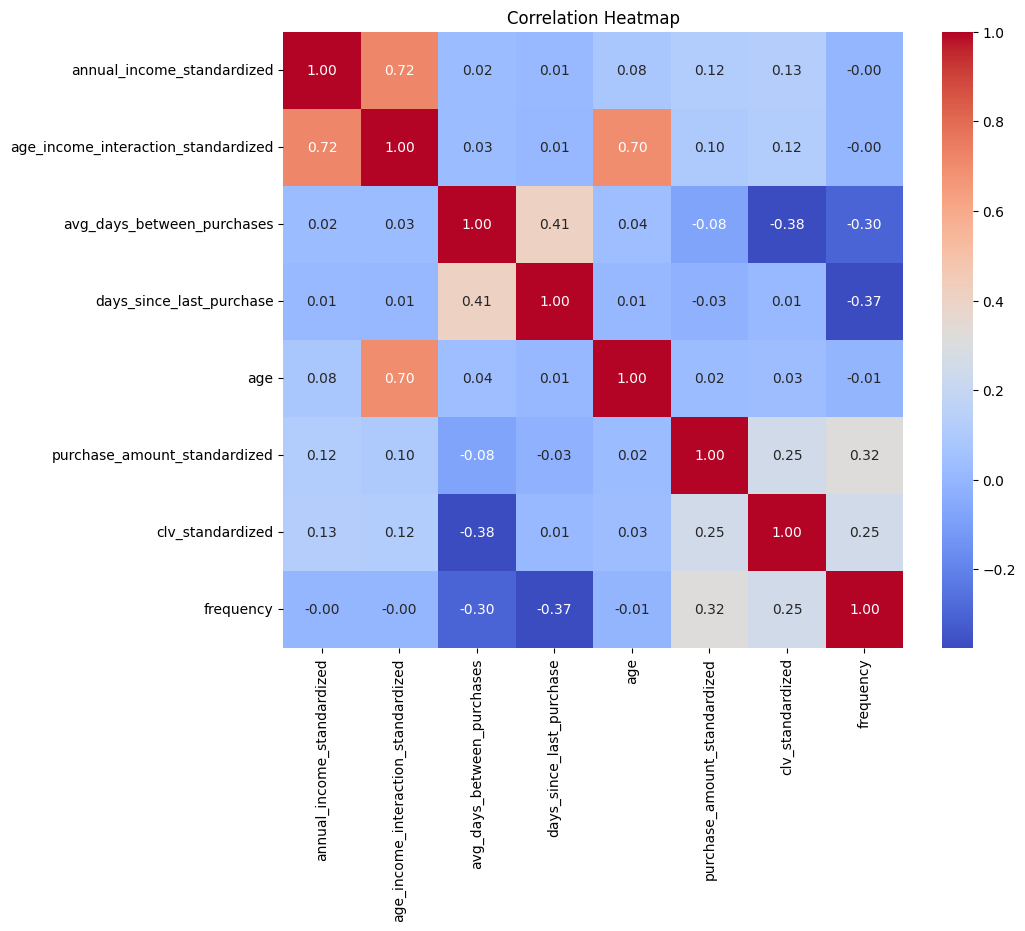

In [34]:
# Plots correlation heatmap for all numerical columns
corr_cols = list(set(df.columns) - set(["customer_id", "gender", "year", "month", "quarter", "age_group", "income_group"]))
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

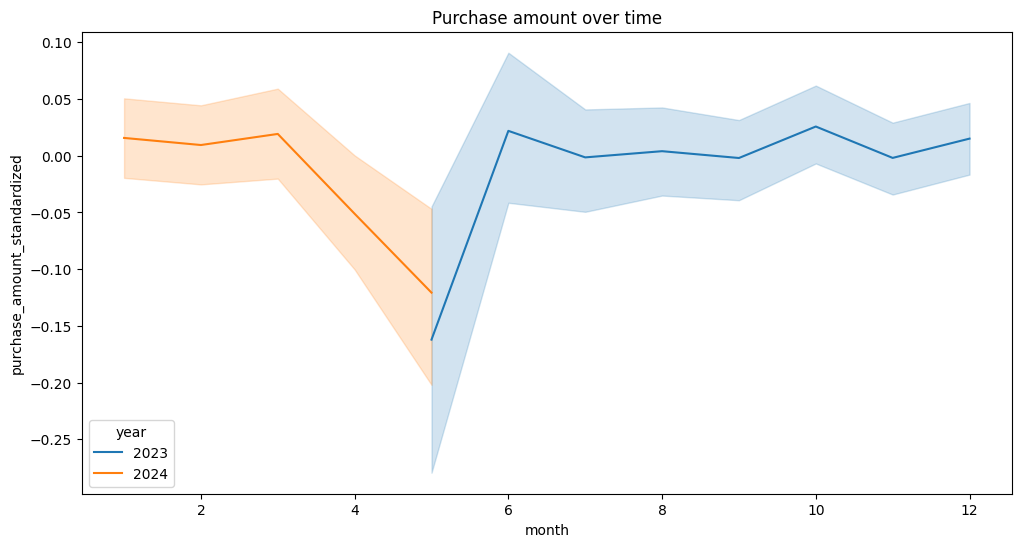

In [35]:
# Plots the trend of purchase amount over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="month",
    y="purchase_amount_standardized",
    hue="year",
)
plt.title("Purchase amount over time")
plt.show()

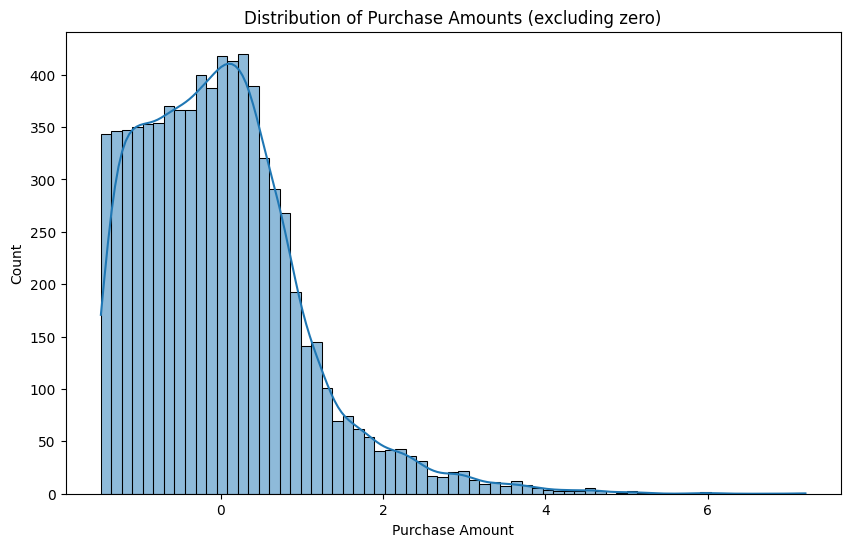

In [36]:
# Plots the distribution of purchase amounts as a histogram with KDE (Kernel Density Estimation)
plt.figure(figsize=(10, 6))
sns.histplot(df[df["purchase_amount_standardized"] != 0]["purchase_amount_standardized"], kde=True)
plt.title("Distribution of Purchase Amounts (excluding zero)")
plt.xlabel("Purchase Amount")
plt.show()

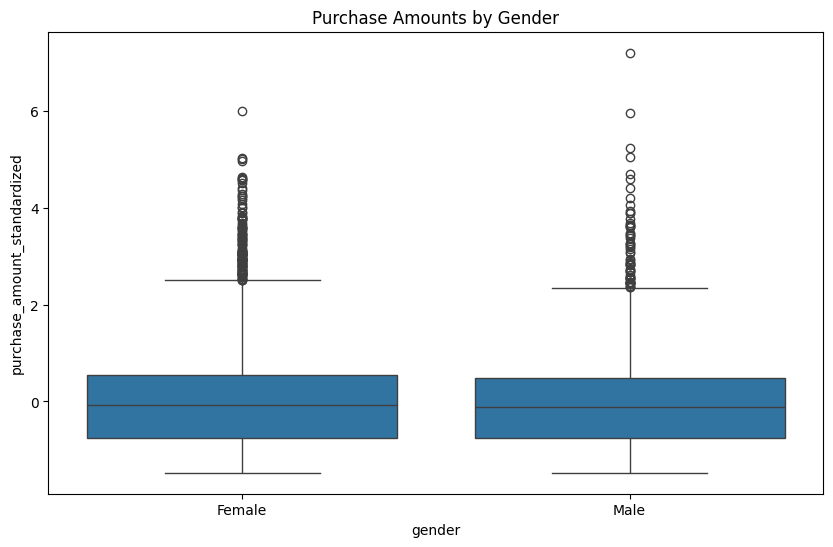

In [37]:
# Plots the distribution of purchase amounts by gender as a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="gender", y="purchase_amount_standardized", data=df[df["purchase_amount_standardized"] != 0])
plt.title("Purchase Amounts by Gender")
plt.show()

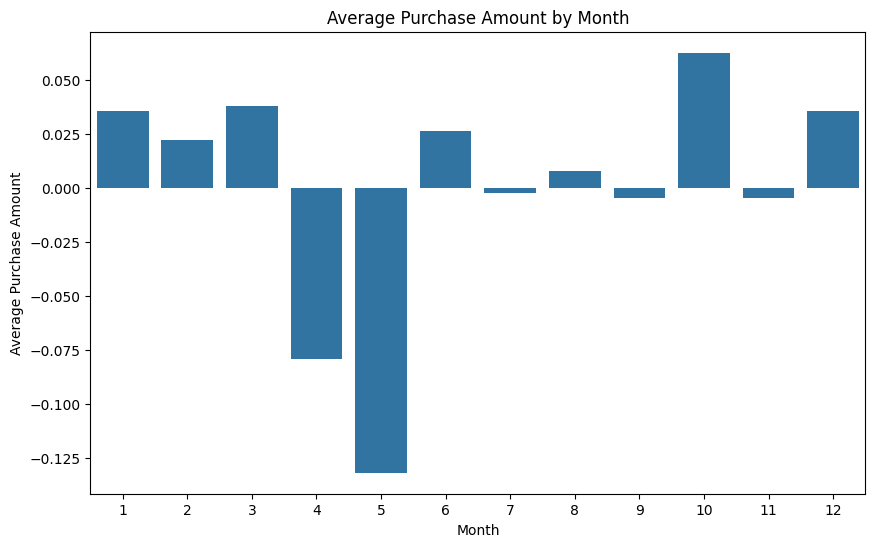

In [38]:
# Plots the average purchase amount by month as a bar plot
monthly_avg = df[df["purchase_amount_standardized"] != 0].groupby("month")["purchase_amount_standardized"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="month", y="purchase_amount_standardized", data=monthly_avg)
plt.title("Average Purchase Amount by Month")
plt.xlabel("Month")
plt.ylabel("Average Purchase Amount")
plt.show()

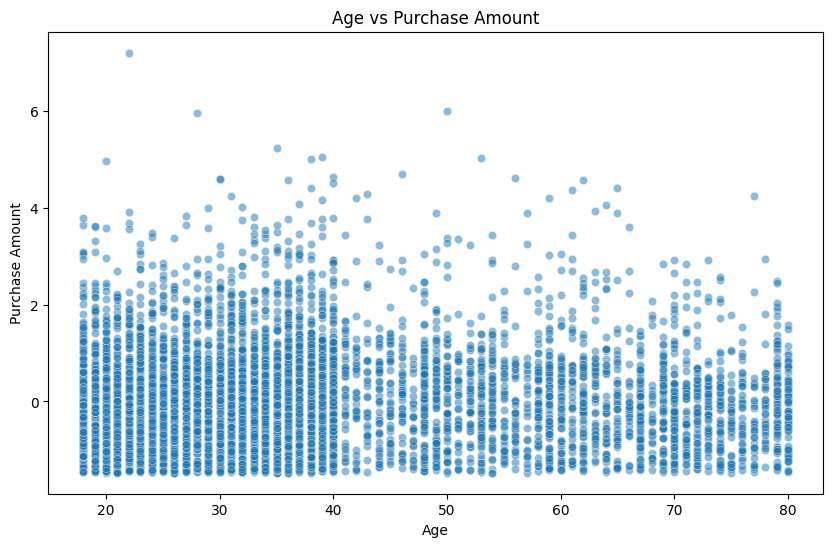

In [39]:
# Plots the purchase amount by age as a bar plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="purchase_amount_standardized", data=df[df["purchase_amount_standardized"] != 0], alpha=0.5)
plt.title("Age vs Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.show()

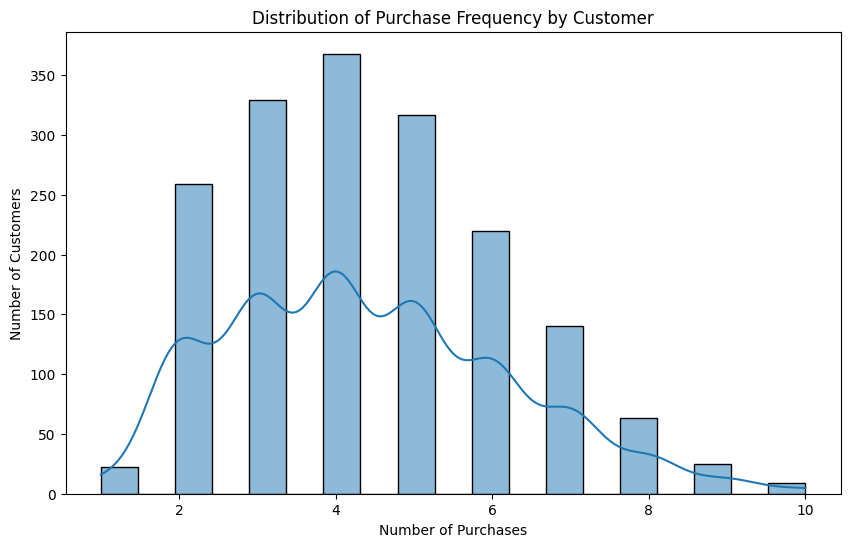

In [40]:
# Plots the distribution of purchase frequency by customer as a histogram with KDE
purchase_frequency = df[df["purchase_amount_standardized"] != 0]["customer_id"].value_counts()
plt.figure(figsize=(10, 6))
sns.histplot(purchase_frequency, kde=True)
plt.title("Distribution of Purchase Frequency by Customer")
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.show()

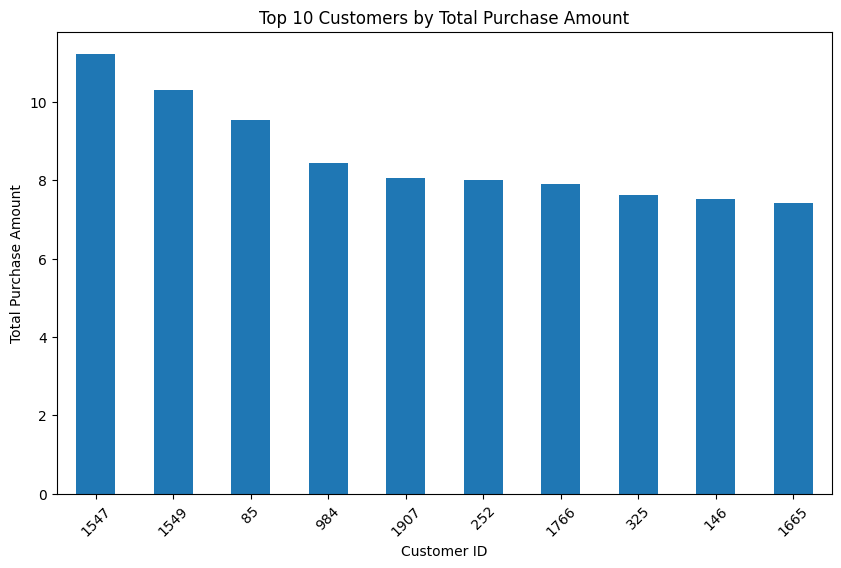

In [41]:
# Plots the top 10 customers by total purchase amount as a bar plot
top_customers = df.groupby("customer_id")["purchase_amount_standardized"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_customers.plot(kind="bar")
plt.title("Top 10 Customers by Total Purchase Amount")
plt.xlabel("Customer ID")
plt.ylabel("Total Purchase Amount")
plt.xticks(rotation=45)
plt.show()

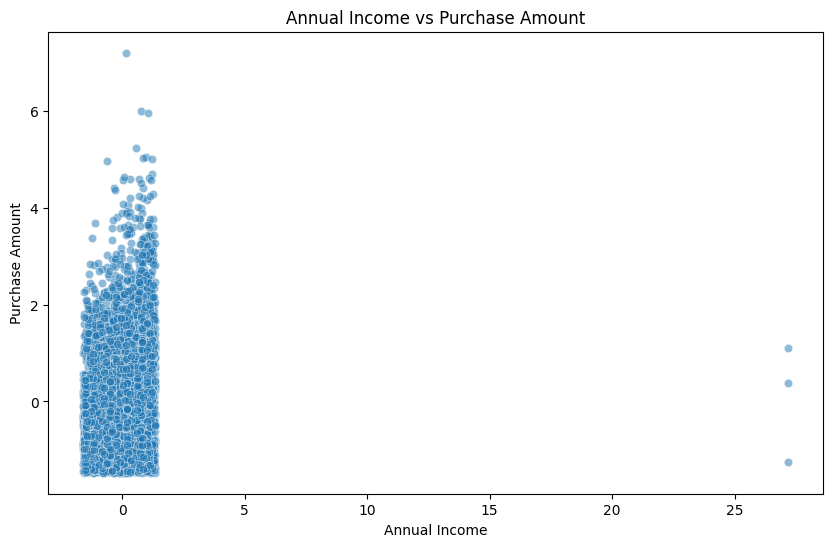

In [42]:
# Plots the purchase amount by annual income as a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="annual_income_standardized", y="purchase_amount_standardized", data=df[df["purchase_amount_standardized"] != 0], alpha=0.5)
plt.title("Annual Income vs Purchase Amount")
plt.xlabel("Annual Income")
plt.ylabel("Purchase Amount")
plt.show()

In [43]:
# Prints the final shape of the dataframe and the new columns added
print(f"Final shape: {df.shape}")
print("\nNew columns added:")
new_columns = set(df.columns) - set(["customer_id", "age", "gender", "annual_income", "purchase_amount", "purchase_date", "next_month_purchase_amount"])
pprint(new_columns)

Final shape: (15083, 15)

New columns added:
{'age_group',
 'age_income_interaction_standardized',
 'annual_income_standardized',
 'avg_days_between_purchases',
 'clv_standardized',
 'days_since_last_purchase',
 'frequency',
 'income_group',
 'month',
 'purchase_amount_standardized',
 'quarter',
 'year'}


In [44]:
df.isna().sum()

customer_id                            0
age                                    0
gender                                 0
frequency                              0
days_since_last_purchase               0
avg_days_between_purchases             0
year                                   0
month                                  0
quarter                                0
age_group                              0
income_group                           0
purchase_amount_standardized           0
annual_income_standardized             0
clv_standardized                       0
age_income_interaction_standardized    0
dtype: int64

In [45]:
# Shift the purchase_amount to create the target variable
df["next_month_purchase_amount"] = df.groupby("customer_id")["purchase_amount_standardized"].shift(-1)

# Drop rows where the target variable is NaN
df = df.dropna(subset=["next_month_purchase_amount"])

<Axes: xlabel='purchase_amount_standardized', ylabel='next_month_purchase_amount'>

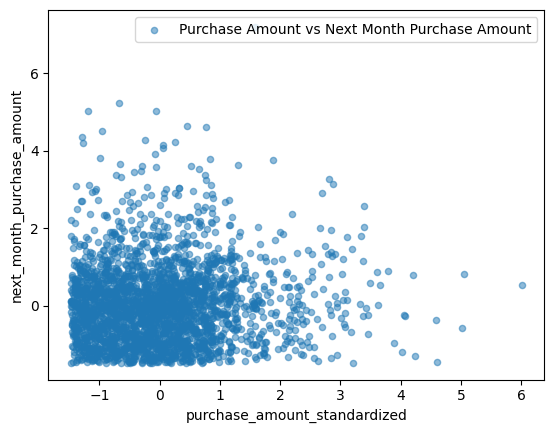

In [46]:
# Plots the purchase amount vs next month purchase amount as a scatter plot
df[
    (df["purchase_amount_standardized"] != 0) &
    (df["next_month_purchase_amount"] != 0)
].plot(
    x="purchase_amount_standardized",
    y="next_month_purchase_amount",
    kind="scatter",
    alpha=0.5,
    label="Purchase Amount vs Next Month Purchase Amount"
)